In [143]:
#Importing Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

%matplotlib inline 
sns.set(style= "ticks")

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore

from sklearn.model_selection import train_test_split   #importing library for splitting the data

from sklearn.linear_model import LogisticRegression #Importing Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve,auc


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection



In [144]:
# Reading Data
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.columns = ["ID","Age","Experience","Income","ZIP Code","Family","CCAvg","Education","Mortgage","PersonalLoan","Securities Account","CD Account","Online","CreditCard"]

In [145]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [103]:
#Name the variables of DataSet
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [146]:
#Shape of dataset
data.shape

(5000, 14)

In [105]:
#Data Type of each attribute
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
PersonalLoan            int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [147]:
# No columns have null data in the file
data.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
PersonalLoan          0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [107]:
#5 point summary of numerical attributes
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
PersonalLoan          5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


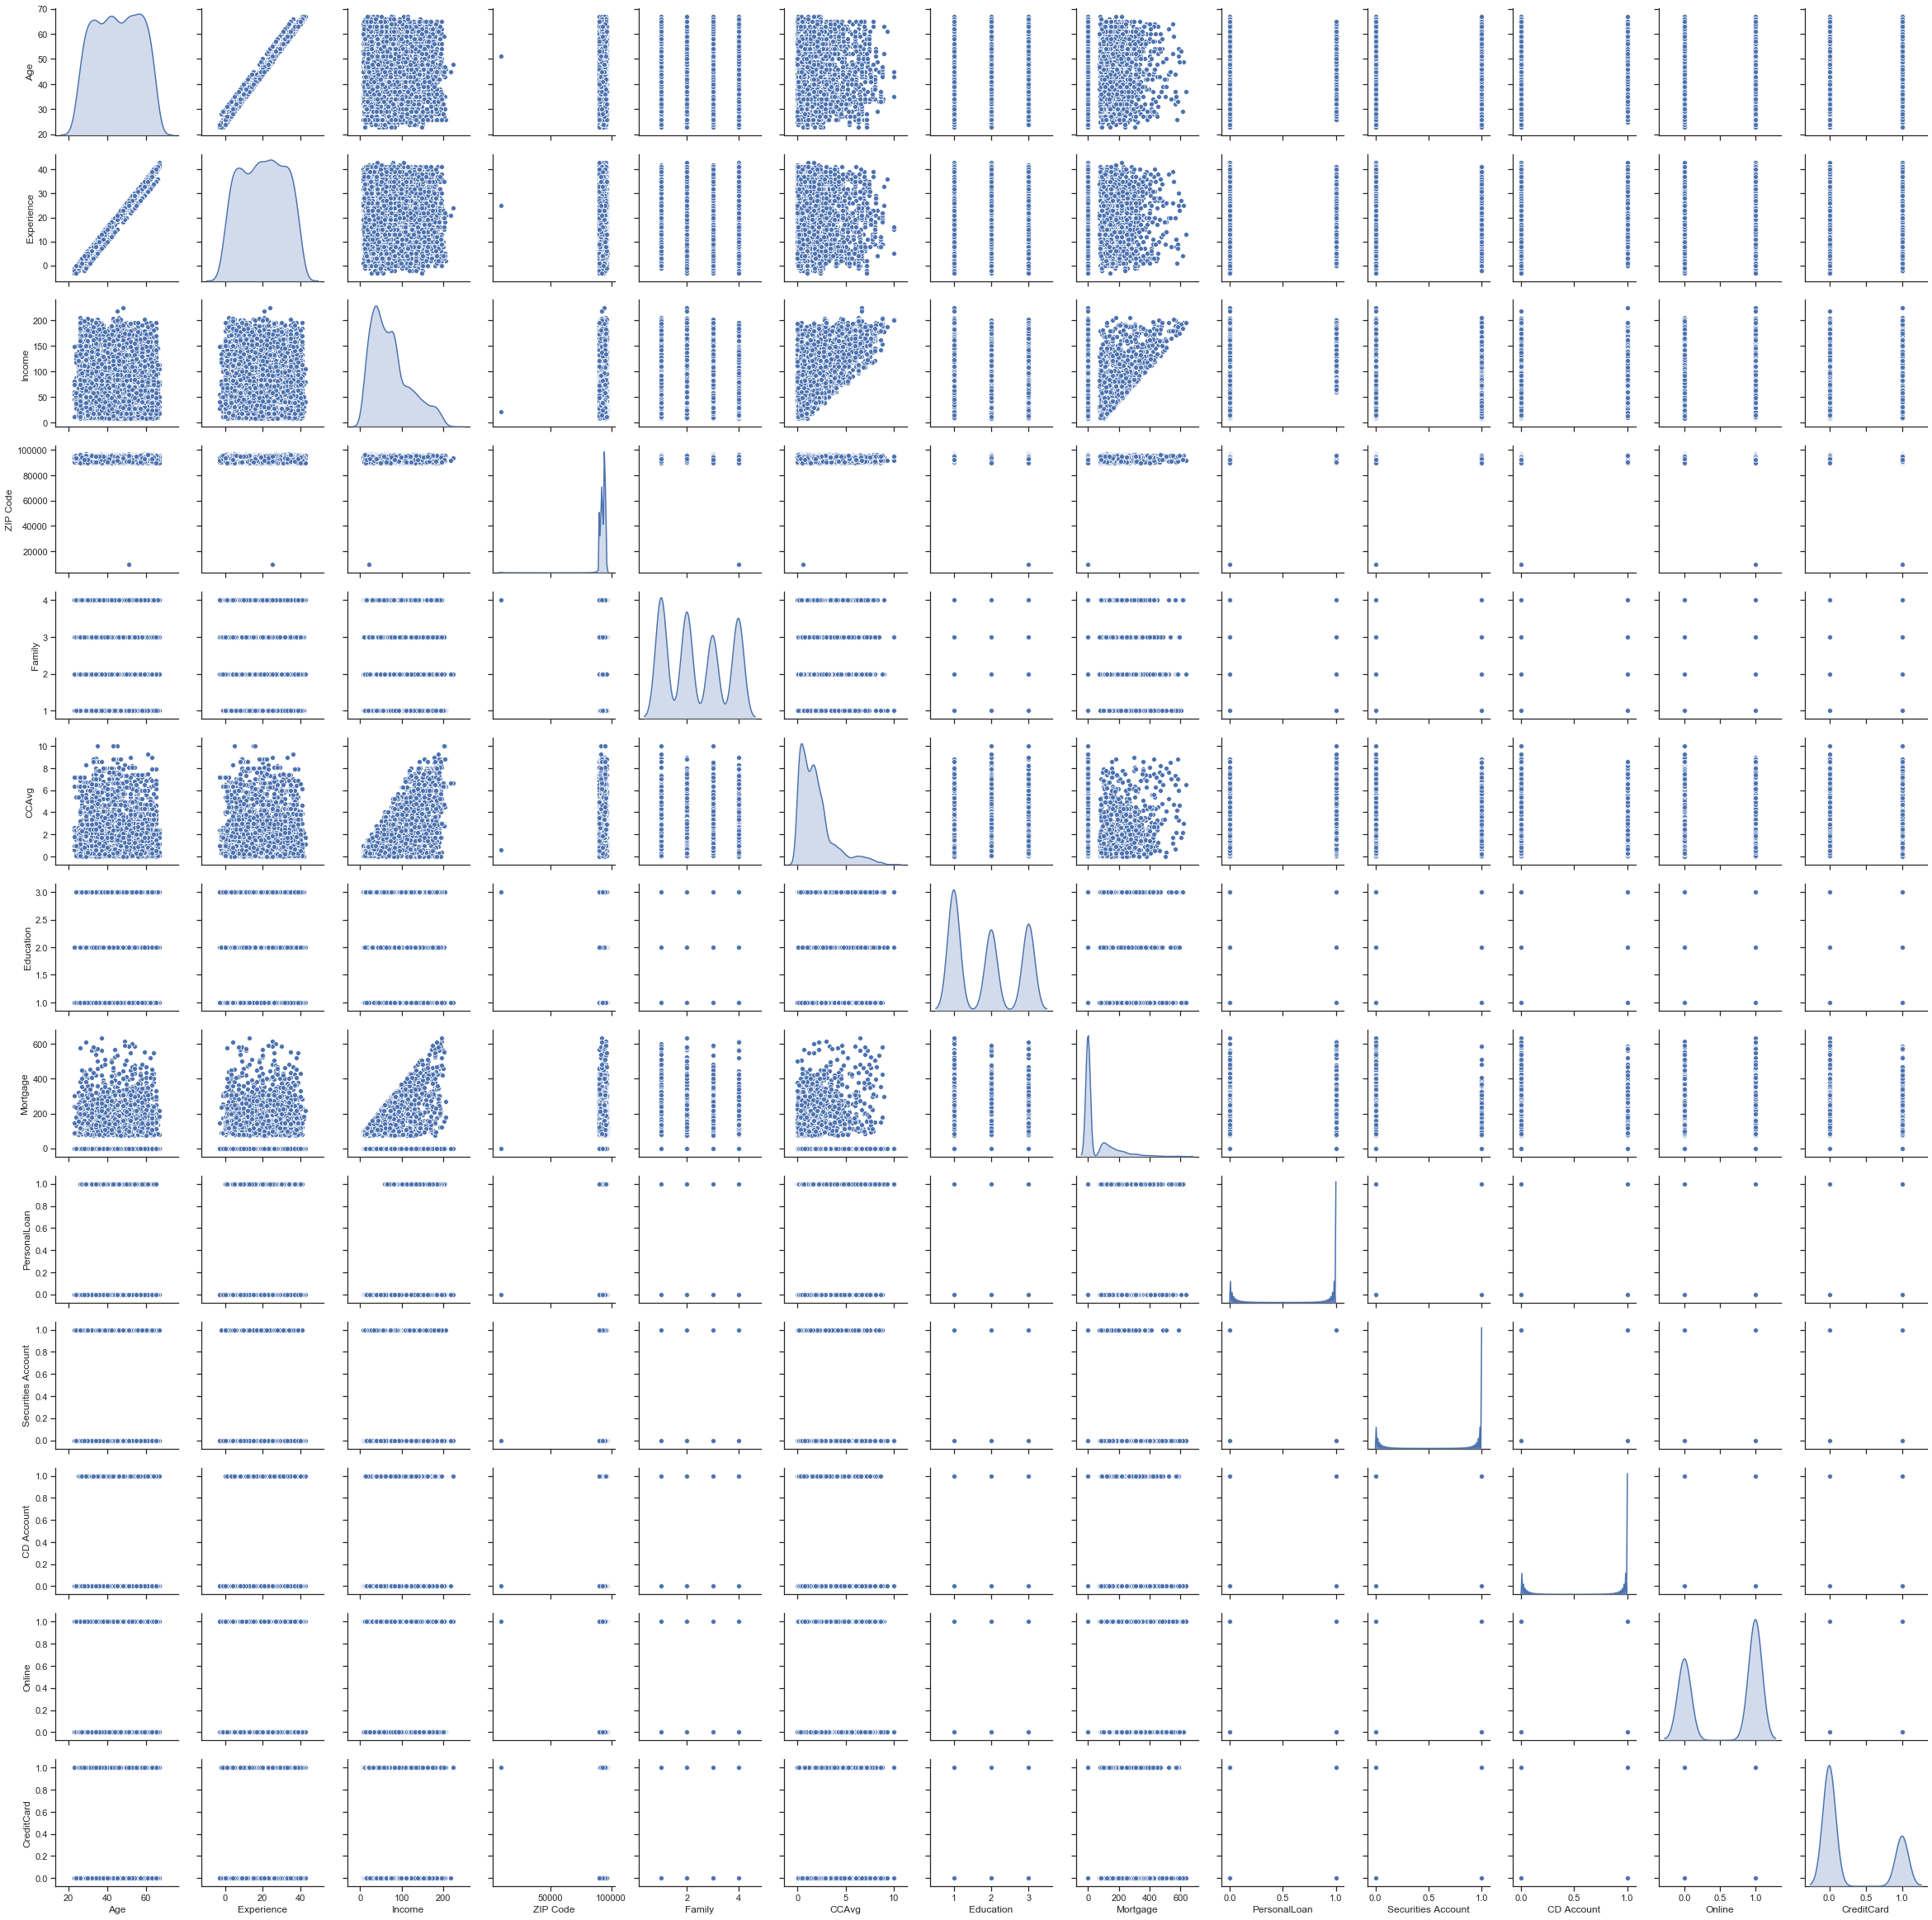

In [109]:
#Plot pairplot
sns.pairplot(data.iloc[:,1:],diag_kind='kde')

1.Age feature is normally distributed with majority of customers are in between 30 years and 60 years of age.Also mean is equal to median.
2.Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
3.Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
4.CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
5.Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K


In [149]:
# there are records with negative experience. 
data[data['Experience'] < 0]['Experience'].count()

52

In [150]:
#clean the negative variable
posExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

negExp.value_counts()  #get the value count of negative experiance

False    4948
True       52
Name: Experience, dtype: int64

In [151]:
# Clean the negative experience record with their Medain.
for id in mylist :

    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]

    data_filtered = posExp[(posExp.Age==age) & (posExp.Education==education)]

    exp = data_filtered['Experience'].median()    
    data.loc[data.loc[np.where(data['ID']==id)].index,'Experience']  = exp
    
   

In [152]:
 data[data['Experience']<0]['Experience'].count() # Checking if records are still negative.
    


0

In [153]:
 data.describe() # get the data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [155]:
#check skewness
data.skew(axis = 0, skipna = True) 

ID                     0.000000
Age                   -0.029341
Experience            -0.013188
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
PersonalLoan           2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64


Data Distribution 

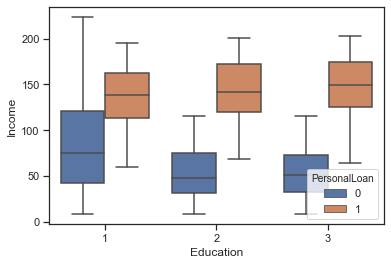

In [156]:
# income and education on personal loan 

sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)


Observation :
customers whose education level is 1 having more income and customers who has taken the personal loan have the same income levels

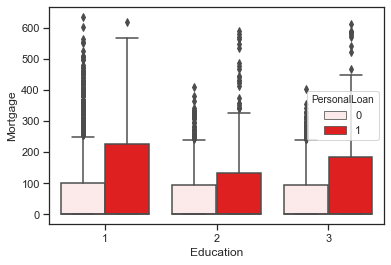

In [157]:
 sns.boxplot(x='Education',y='Mortgage',hue='PersonalLoan',data=data,color='red')

Observation:
customer who do not have personal loan and customer who has personal loan have high mortgage.

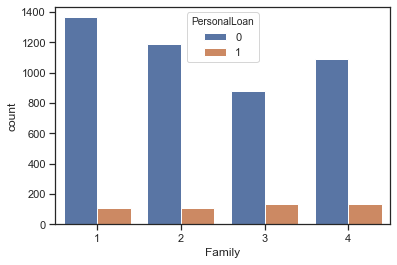

In [120]:
sns.countplot(x='Family',data=data,hue = 'PersonalLoan')

Observation:
Families with size of 3 are more likely to take loan. 

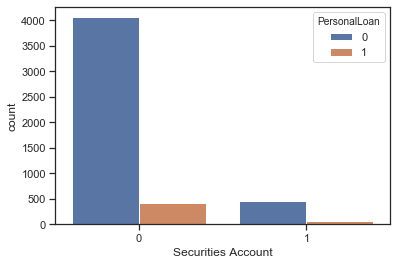

In [158]:
sns.countplot(x="Securities Account",data=data,hue = 'PersonalLoan')

Observation : Most of the customers who does not have loan have securities account

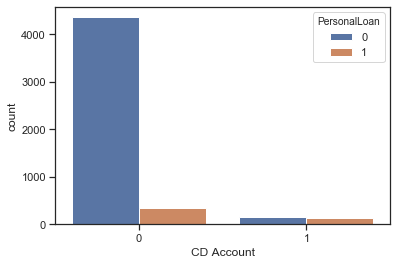

In [159]:
sns.countplot(x="CD Account",data=data,hue = 'PersonalLoan')

Observation: Customers who does not have CD account , does not have loan as well. But almost all customers who has CD account has loan as well

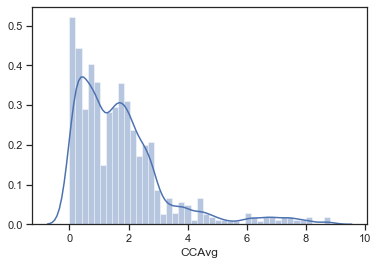

In [160]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'])


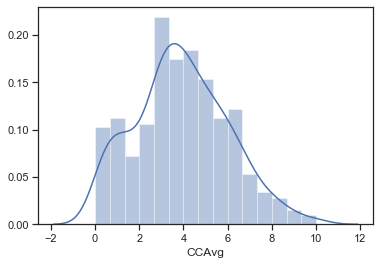

In [90]:
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'])

Observation - Here we can see that the customers with higher CCAvg have Personal Loan.

In [124]:
print('Credit Card  spending having No Personal Loan', data[data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit Card  spending having Personal Loan', data[data.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit Card  spending having No Personal Loan 1400.0
Credit Card  spending having Personal Loan 3800.0


OBSERVATION 
The customers who are spending average credit card with a median of 3800 dollar gives a higher probability of Personal loan,whereas the customers who are spending Lower credit card with a median of 1400 dollars are less likely to take a loan.

Text(0, 0.5, 'Age')

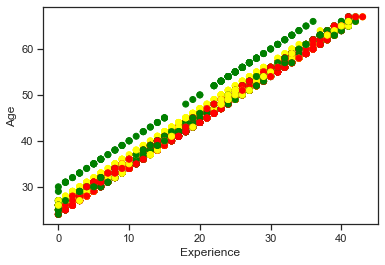

In [161]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

Observation::
    The above plot show with experience and age have a positive correlation. As experience increase age also increases. 

In [126]:
# Calculating Correlation
cor=data.corr()
cor

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009308,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994159,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009308,0.994159,1.000000,-0.048095,-0.030649,-0.049420,-0.047694,0.013075,-0.012935,-0.011498,0.001059,0.007381,0.014501,0.007935
Income,-0.017695,-0.055269,-0.048095,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.030649,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.049420,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.047694,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013075,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.012935,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.011498,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


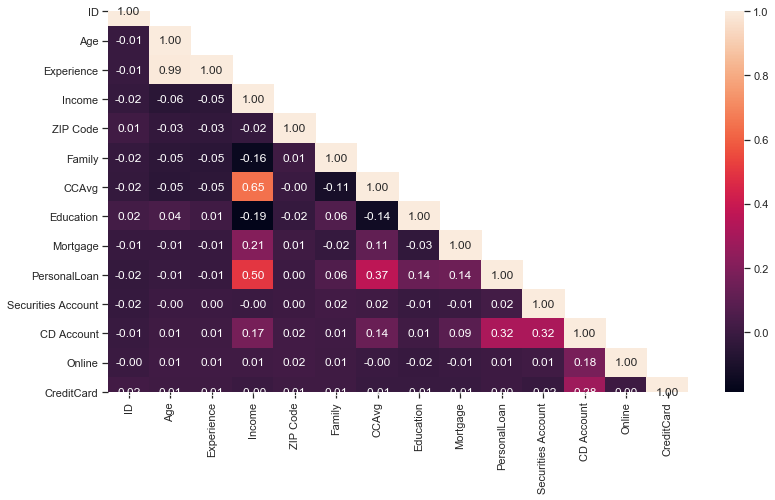

In [61]:
#Correlation with heat map

corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')

Observation

1.Income and CCAvg is moderately correlated.--0.65
2.Age and Experience is highly correlated.--0.99
3."Income" , "CCAvg" , "Mortgage" distribution is positively skewed.
4.Distributin of "Family" and "Education" are evenly distributed.


SPLIT DATA

In [162]:
my_data=data.drop(['ID','ZIP Code','Experience'], axis =1 )
my_data.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,155,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,104,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [72]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
PersonalLoan          5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [163]:
new_data=my_data[['Age','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard','PersonalLoan']]

In [167]:

X = new_data.drop('PersonalLoan',axis=1)# Select all the independant variables
Y =  new_data['PersonalLoan']  # select the target
test_size = 0.30 # taking 70:30 training and test set
seed = 15  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # To set the random state
type(X_train)

pandas.core.frame.DataFrame

Classofication - Logistic Regression.

In [165]:
# fit the model on train
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:

#predict the model on test 
y_predict = Logistic_model.predict(X_test)

print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1361
           1       0.09      0.31      0.14       139

    accuracy                           0.66      1500
   macro avg       0.50      0.50      0.46      1500
weighted avg       0.83      0.66      0.73      1500



In [166]:
print(accuracy_score(Y_test,y_predict))

0.8866666666666667


In [169]:
print(confusion_matrix(Y_test,y_predict))

[[943 418]
 [ 96  43]]


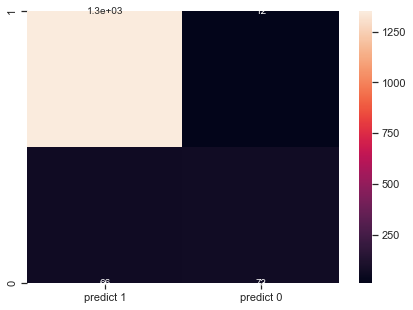

In [86]:
df_cm = pd.DataFrame(confusion_matrix(Y_test,y_predict),index = [i for i in ["1","0"]],
                    columns = [i for i in ["predict 1","predict 0"]])
plot.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Naive Bayes

In [170]:
naive_model = GaussianNB()
naive_model.fit(X_train,Y_train)
y_predict = naive_model.predict(X_test)
print(classification_report(Y_test,y_predict))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1361
           1       0.42      0.60      0.49       139

    accuracy                           0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500

0.8866666666666667
[[1247  114]
 [  56   83]]


In [173]:
print(accuracy_score(Y_test,y_predict))


0.8866666666666667
[[1247  114]
 [  56   83]]


In [174]:
print(confusion_matrix(Y_test,y_predict))

[[1247  114]
 [  56   83]]


Got accuracy around 88% which is much less as compatred to Logistic Regression.

kNN

In [ ]:
Standardization of data is required for KNN Classification model.

In [171]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
array = new_data.values
X_std = pd.DataFrame(StandardScaler().fit_transform(new_data))
X_std.columns = new_data.columns
# Transform data into features and target
X_new = np.array(new_data.iloc[:,1:11]) 
Y_new = np.array(new_data['PersonalLoan'])

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.3, random_state=5)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.9366666666666666
0.934
0.9373333333333334
0.9333333333333333


In [176]:
print(confusion_matrix(y_test, y_pred))

[[1331   20]
 [  80   69]]


MODEL COMPARISION

LR: 0.949800 (0.007718)
NB: 0.883000 (0.011567)
KNN: 0.914600 (0.011351)


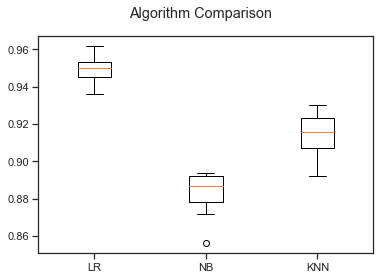

In [172]:
#Model comparison
X=new_data.drop(['PersonalLoan'],axis=1)
y=new_data.pop('PersonalLoan')
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plot.boxplot(results)
ax.set_xticklabels(names)
plot.show()

Conclusion

Conclusion
The aim of the bank is to convert there liability customers into loan customers. 
They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Three classification algorithms were used in this study. 
From the above graph , it seems like Logistic Regression algorithm have the highest accuracy and we can choose that as our final model